<a href="https://colab.research.google.com/github/chanhee922/DeepLearning_Practice/blob/master/%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EA%B0%84%EB%8B%A8%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL_4

## sklearn package를 이용한 다양한 훈련데이터셋 수집하기

In [0]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import load_files
from sklearn.datasets import load_linnerud
from sklearn.datasets import load_sample_image
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import load_svmlight_files

In [0]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [0]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
from pprint import pprint as pp

In [0]:
pp( type(cancer.data) )
pp( type(cancer.target) )

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
import numpy as np

In [0]:
np.info(cancer.data)

In [0]:
 diabetes = load_diabetes()

In [0]:
pp( type(diabetes.data) )
pp( diabetes.data.ndim )
pp( diabetes.data.shape )
pp( diabetes.data.dtype )
pp( diabetes.data.size )
pp(diabetes.keys())
pp(diabetes.data)

<class 'numpy.ndarray'>
2
(442, 10)
dtype('float64')
4420
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])


In [0]:
pp( diabetes.data[ :3, :3 ] )

array([[ 0.03807591,  0.05068012,  0.06169621],
       [-0.00188202, -0.04464164, -0.05147406],
       [ 0.08529891,  0.05068012,  0.04445121]])


In [0]:
diabetes.data[0][0]

0.0380759064334241

In [0]:
type( diabetes.target )
pp( diabetes.target.ndim )
pp( diabetes.target.shape )
pp( diabetes.target.dtype )
pp( diabetes.target.size )

1
(442,)
dtype('float64')
442


In [0]:
pp( diabetes.target[:5] )

array([151.,  75., 141., 206., 135.])


Text(0, 0.5, 'target')

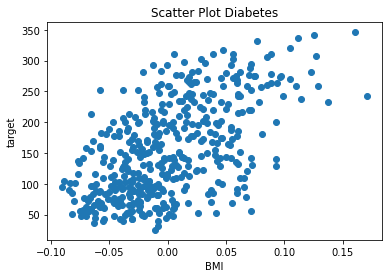

In [0]:
import matplotlib.pyplot as plt

plt.scatter( diabetes.data[:,2], diabetes.target )
plt.title('Scatter Plot Diabetes')
plt.xlabel('BMI')
plt.ylabel('target')


In [0]:
x = diabetes.data[:, 2]
y = diabetes.target
w = 1.
b = 1.

In [0]:
x.shape, y.shape

((442,), (442,))

In [0]:
# 주어진 문제 : 단순선형회귀(y = wx + b)

y_hat = x[0] * w + b
pp(y_hat)
pp(y[0])


1.0616962065186886
151.0


In [0]:
w_rate = .1 
w_inc = w + w_rate

y_hat_inc = x[0] * w_inc + b
pp(y_hat_inc)
pp(y[0])

1.0678658271705574
151.0


In [0]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)

pp(w_rate)
pp(x[0])

0.061696206518688734
0.0616962065186885


In [0]:
w_new = w + w_rate
print( 'w = ', w, ' w_rate = ', w_rate, ' w_new = ', w_new )
pp(w_new)

w =  1.0  w_rate =  0.061696206518688734  w_new =  1.0616962065186888
1.0616962065186888


In [0]:
b_inc = b + 2.34 

y_hat_inc = x[0] * w + b_inc
pp(y_hat_inc)
pp(y[0])

3.401696206518688
151.0


In [0]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
pp(b_rate)

1.0


In [0]:
b_new = b + 1
print(b_new)

2.0


## 오차역전파 활용

In [0]:
err = y[0] - y_hat
w_new = w + (w_rate * err)
b_new = b + (1*err)

print(w_new, b_new)

10.250624555904514 150.9383037934813


In [0]:
for xi, yi in zip(x, y):
    y_hat = xi * w + b
    err = yi - y_hat

    w = w + ( w_rate * err )
    b = b + ( 1* err )

    print('\t* w=', w, 'b=', b)
    pass

print( ' - Adjusted w= ', w, 'b=', b )

	* w= 10.215412776017372 b= 150.36757535045336
	* w= 5.597960923560831 b= 75.5258287828124
	* w= 9.622116665791992 b= 140.75116384473688
	* w= 13.654605694626428 b= 206.1115685823107
	* w= 9.297943498017599 b= 135.49681862537244
	* w= 6.946180964250388 b= 97.37838855536765
	* w= 9.472592058756597 b= 138.32760143348713
	* w= 4.8262721138222755 b= 63.01794777549637
	* w= 7.706515682673466 b= 109.70223731895024
	* w= 20.04555521431125 b= 309.69896690555936
	* w= 7.27326943850537 b= 102.67998637979628
	* w= 5.187486560756075 b= 68.87267478896972
	* w= 11.991154954090952 b= 179.14960715229
	* w= 12.353503719440573 b= 185.02271971132328
	* w= 8.237972577730844 b= 118.31633087584322
	* w= 11.497535092155353 b= 171.1487933293838
	* w= 11.149871517542596 b= 165.51370497905802
	* w= 9.814222292419231 b= 143.86489866681293
	* w= 6.929203994867621 b= 97.10321816255546
	* w= 11.310988046450307 b= 168.1251544991984
	* w= 5.173327484946695 b= 68.64317808879431
	* w= 3.968558851199304 b= 49.1157435554